In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [6]:
data = pd.read_csv('Social_Network_Ads (2).csv')

In [7]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [8]:
data.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 14.1+ KB


In [11]:
round(data.describe(),1)

,User ID,Age,EstimatedSalary,Purchased
count,400.0,400.0,400.0,400.0
mean,15691539.8,37.7,69742.5,0.4
std,71658.3,10.5,34097.0,0.5
min,15566689.0,18.0,15000.0,0.0
25%,15626763.8,29.8,43000.0,0.0
50%,15694341.5,37.0,70000.0,0.0
75%,15750363.0,46.0,88000.0,1.0
max,15815236.0,60.0,150000.0,1.0


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,auc,roc_curve

In [14]:
data['Gender'].value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

In [15]:
f = {'Female':1,'Male':0}
data['Gender']=data['Gender'].map(f)

In [16]:
x = data.drop(columns=['Purchased','Gender','User ID']).to_numpy()
y = data['Purchased'].to_numpy()

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state =0,train_size=0.75,stratify=y)

In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

In [23]:
print('y_train with 0 :-',len(y_train[y_train==0]))
print('y_train with 1 :-',len(y_train[y_train==1]))

y_train with 0 :- 193
y_train with 1 :- 107


In [24]:
from sklearn.naive_bayes import GaussianNB

In [43]:
classifier = GaussianNB()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print('Accuracy :-',accuracy_score(y_test,y_pred))

Accuracy :- 0.85


In [44]:
mat = confusion_matrix(y_test,y_pred)
mat

array([[58,  6],
       [ 9, 27]], dtype=int64)

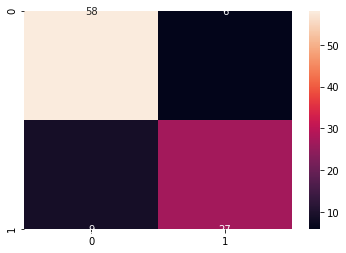

In [45]:
sns.heatmap(mat,annot=True)
plt.show()

In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89        64
           1       0.82      0.75      0.78        36

    accuracy                           0.85       100
   macro avg       0.84      0.83      0.83       100
weighted avg       0.85      0.85      0.85       100



In [47]:
dataframe = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

In [48]:
dataframe.tail()

,Actual,Predicted
95,1,1
96,0,0
97,1,0
98,0,0
99,1,1


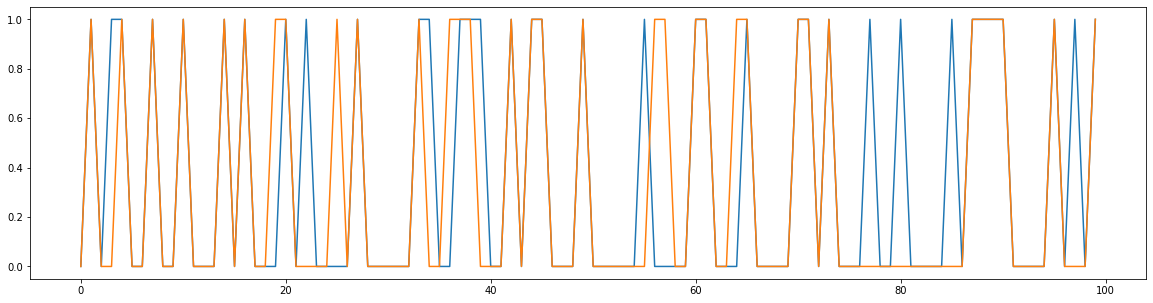

In [49]:
plt.figure(figsize=(20,5))
plt.plot(dataframe)
plt.show()

In [50]:
from sklearn.metrics import mean_squared_error

In [51]:
sqrt_error = np.sqrt(mean_squared_error(y_test,y_pred))
sqrt_error

0.3872983346207417

In [52]:
np.std(y_test)

0.48000000000000004

**Since Standard Deviation of actual(y_test) is greater than the square root error,that's means our model is good.**

In [53]:
from sklearn.model_selection import cross_val_score

In [54]:
print('Accuarcy with train data :-',round(classifier.score(X_train,y_train)*100))
print('Accuarcy with test data :-',round(classifier.score(X_test,y_test)*100,1))

Accuarcy with train data :- 90.0
Accuarcy with test data :- 85.0


In [57]:
val_score_mean = cross_val_score(classifier,X_train,y_train,cv=10).mean()*100
val_score_mean

89.33333333333333

In [58]:
val_score_max = cross_val_score(classifier,X_train,y_train,cv=10).max()*100
val_score_max

93.33333333333333

In [60]:
val_score_min = cross_val_score(classifier,X_train,y_train,cv=10).min()*100
val_score_min

80.0

**Due to marginal changes in random_state our model will gives us an accuarcy diffrent diffrent so use k-fold cross validation taken it's mean so that why we can say we had predicted the mean value of the model precition for k=10**
- Although the we have calculated max and min of it showing it is varing from  93.33 to 80.0.

In [61]:
from plotnine import aes,geom_abline,geom_line,geom_area,ggplot,ggtitle

In [66]:
probab = classifier.predict_proba(X_test)[:,1]

In [67]:
fpr,tpr,thresh=roc_curve(y_test,probab)

In [68]:
roc_data = pd.DataFrame(dict(fpr=fpr,tpr=tpr))

In [69]:
auc = round(auc(fpr,tpr),1)
auc

0.9

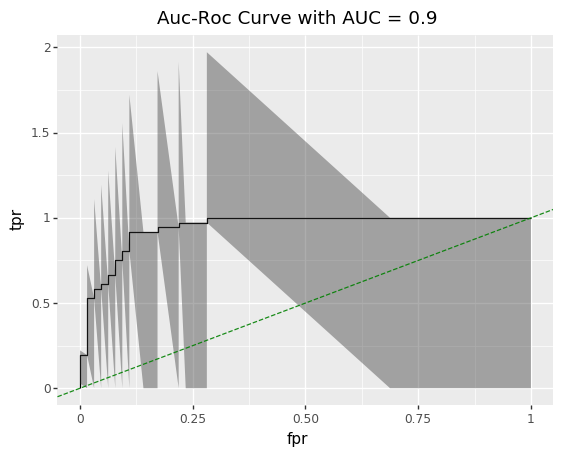

<ggplot: (20227655)>

In [79]:
ggplot(roc_data,aes(x='fpr',y='tpr'))+geom_line()+geom_area(alpha=0.4)+geom_abline(linetype='dashed',color='green',alpha=0.9)+ggtitle('Auc-Roc Curve with AUC = {}'.format(auc))

## Thank you